In [1]:
!pip install geopandas

In [2]:
import pandas as pd
import geopandas

In [3]:
%matplotlib inline

# Module 1 Get Started on GeoPandas

## Read from Dataset

In [4]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [5]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [6]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
pop_est       177 non-null int64
continent     177 non-null object
name          177 non-null object
iso_a3        177 non-null object
gdp_md_est    177 non-null float64
geometry      177 non-null geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


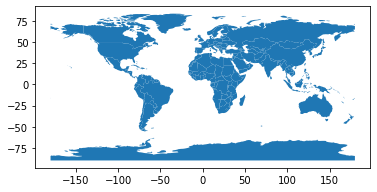

In [7]:
# Plot GeoDataFrame

world.plot()

In [8]:
cities= geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


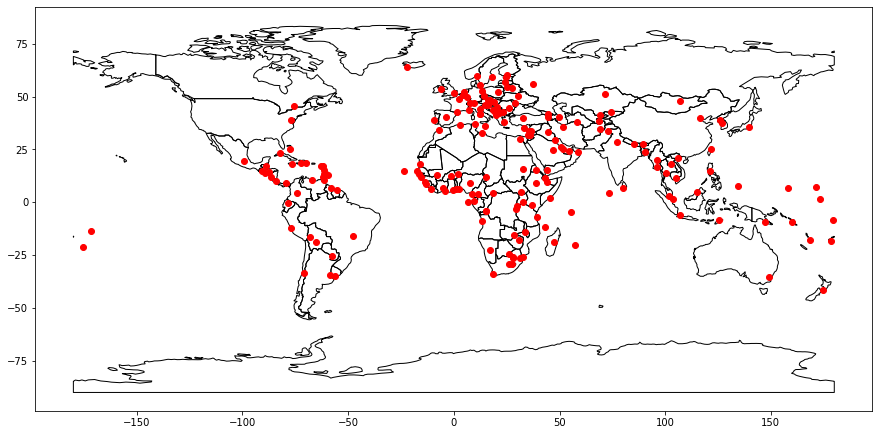

In [9]:
ax = world.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
cities.plot(ax=ax,color='red')

## Read GeoJSON Data

In [10]:
url = "http://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_land.geojson"
world = geopandas.read_file(url)
world.head()

,scalerank,featureclass,geometry
0,1,Country,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,1,Country,"POLYGON ((-159.20818 -79.49706, -161.12760 -79..."
2,1,Country,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,1,Country,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,1,Country,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."


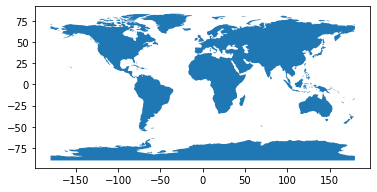

In [11]:
world.plot()

## Read Shapefile Data

In [12]:
countries = geopandas.read_file("zip://data/ne_110m_admin_0_countries.zip")
# or if the archive is unpacked:
# countries = geopandas.read_file("data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

In [13]:
countries.head()


,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


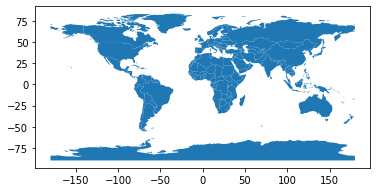

In [14]:
countries.plot()

## Shapely

In [15]:
from shapely.geometry import Point, Polygon, LineString

### Point

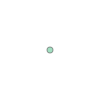

In [16]:
point = Point(1, 1)
point

In [17]:
list(point.coords)

[(1.0, 1.0)]

In [18]:
point.x

1.0

In [19]:
point.y

1.0

### Line

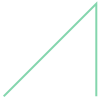

In [20]:
line = LineString([(1, 1), (2,2), (2, 1)])
line

In [21]:
list(line.coords)

[(1.0, 1.0), (2.0, 2.0), (2.0, 1.0)]

In [22]:
# Support slicing
line.coords[:]

[(1.0, 1.0), (2.0, 2.0), (2.0, 1.0)]

In [23]:
# x-y bounding box is a (minx, miny, maxx, maxy) tuple.
line.bounds

(1.0, 1.0, 2.0, 2.0)

In [24]:
line.length

2.414213562373095

### Polygon

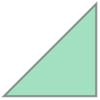

In [25]:
polygon = Polygon([(1, 1), (2,2), (2, 1)])
polygon

In [26]:
polygon.bounds

(1.0, 1.0, 2.0, 2.0)

In [27]:
polygon.length

3.414213562373095

In [28]:
polygon.area

0.5

## Creating GeoSeries from Shapely

In [29]:
gs = geopandas.GeoSeries([Point(-120, 45), Point(-121.2, 46), Point(-122.9, 47.5)])
gs

0    POINT (-120.00000 45.00000)
1    POINT (-121.20000 46.00000)
2    POINT (-122.90000 47.50000)
dtype: geometry

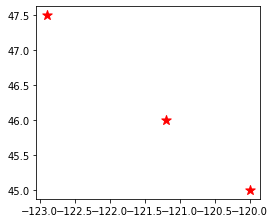

In [30]:
gs.plot(marker='*', color='red', markersize=100, figsize=(4, 4))

In [31]:
# import matplotlib.pyplot as plt
# gs.plot(marker='*', color='red', markersize=100, figsize=(4, 4))
# plt.xlim([-123, -119.8])
# plt.ylim([44.8, 47.7]);

## Creating GeoSeries from Geometry

In [32]:
data = {'name': ['a', 'b', 'c'],
        'lat': [45, 46, 47.5],
        'lon': [-120, -121.2, -122.9]}

In [33]:
list(zip(data['lon'], data['lat']))

[(-120, 45), (-121.2, 46), (-122.9, 47.5)]

In [34]:
geometry = [Point(x) for x in zip(data['lon'], data['lat'])]
geometry

In [35]:
gs = geopandas.GeoSeries(geometry, index=data['name'])
gs

a    POINT (-120.00000 45.00000)
b    POINT (-121.20000 46.00000)
c    POINT (-122.90000 47.50000)
dtype: geometry

## Ex: GeoSeries

In [36]:
data = {'name': ['Sentosa', 'Jurong', 'Tampines'],
        'lat': [1.2494, 1.3329, 1.3496],
        'lon': [103.8303, 103.7436, 103.9568]}

In [37]:
geometry = [Point(x) for x in zip(data['lon'], data['lat'])]
geometry

In [38]:
gs = geopandas.GeoSeries(geometry, index=data['name'])
gs

Sentosa     POINT (103.83030 1.24940)
Jurong      POINT (103.74360 1.33290)
Tampines    POINT (103.95680 1.34960)
dtype: geometry

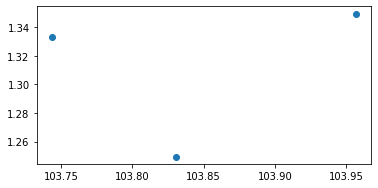

In [39]:
gs.plot()

In [40]:
list(gs.iteritems())

[('Sentosa', <shapely.geometry.point.Point at 0x119cb2ef0>),
 ('Jurong', <shapely.geometry.point.Point at 0x119cb28d0>),
 ('Tampines', <shapely.geometry.point.Point at 0x119cb2b38>)]

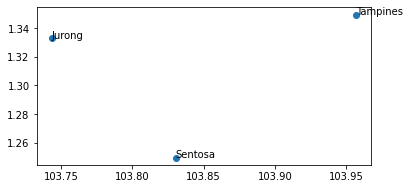

In [41]:
import matplotlib.pyplot as plt

gs.plot()
for name, point in gs.iteritems():
    plt.annotate(s=name, xy=point.coords[0])

## GeoSeries Attributes

In [42]:
countries

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."
...,...,...,...,...,...,...
172,VUT,Vanuatu,Oceania,282814.0,723.0,"MULTIPOLYGON (((167.84488 -16.46633, 167.51518..."
173,YEM,Yemen,Asia,28036829.0,73450.0,"POLYGON ((52.00001 19.00000, 52.78218 17.34974..."
174,ZAF,South Africa,Africa,54841552.0,739100.0,"POLYGON ((19.89577 -24.76779, 20.16573 -24.917..."
175,ZMB,Zambia,Africa,15972000.0,65170.0,"POLYGON ((23.21505 -17.52312, 22.56248 -16.898..."


In [43]:
countries.geometry

0      POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1      MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...
2      POLYGON ((21.02004 40.84273, 20.99999 40.58000...
3      POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4      MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...
                             ...                        
172    MULTIPOLYGON (((167.84488 -16.46633, 167.51518...
173    POLYGON ((52.00001 19.00000, 52.78218 17.34974...
174    POLYGON ((19.89577 -24.76779, 20.16573 -24.917...
175    POLYGON ((23.21505 -17.52312, 22.56248 -16.898...
176    POLYGON ((29.43219 -22.09131, 28.79466 -21.639...
Name: geometry, Length: 177, dtype: geometry

In [44]:
type(countries.geometry)

geopandas.geoseries.GeoSeries

In [45]:
countries.geometry.area

0       63.593500
1      103.599439
2        3.185163
3        7.095047
4      278.923392
          ...    
172      0.631326
173     38.475618
174    112.718524
175     62.789498
176     32.280371
Length: 177, dtype: float64

In [46]:
countries.geometry.bounds

,minx,miny,maxx,maxy
0,60.528430,29.318572,75.158028,38.486282
1,11.640096,-17.930636,24.079905,-4.438023
2,19.304486,39.624998,21.020040,42.688247
3,51.579519,22.496948,56.396847,26.055464
4,-73.415436,-55.250000,-53.628349,-21.832310
...,...,...,...,...
172,166.629137,-16.597850,167.844877,-14.626497
173,42.604873,12.585950,53.108573,19.000003
174,16.344977,-34.819166,32.830120,-22.091313
175,21.887843,-17.961229,33.485688,-8.238257


## Creating GeoDataFrame from DataFrame

In [47]:
df = pd.DataFrame(data)
df

,name,lat,lon
0,Sentosa,1.2494,103.8303
1,Jurong,1.3329,103.7436
2,Tampines,1.3496,103.9568


In [48]:
gdf = geopandas.GeoDataFrame(df, geometry=geometry)

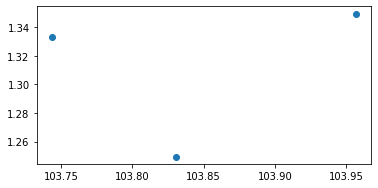

In [49]:
gdf.plot()

## Ex: Creating DataFrame

In [50]:
import pandas as pd
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [51]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [52]:
geometry = [Point(x) for x in zip(df['Longitude'], df['Latitude'])]

In [53]:
gdf = geopandas.GeoDataFrame(df, geometry=geometry)

In [54]:
print(gdf.head())

           City    Country  Latitude  Longitude                     geometry
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-58.66000 -34.58000)
1      Brasilia     Brazil    -15.78     -47.91  POINT (-47.91000 -15.78000)
2      Santiago      Chile    -33.45     -70.66  POINT (-70.66000 -33.45000)
3        Bogota   Colombia      4.60     -74.08    POINT (-74.08000 4.60000)
4       Caracas  Venezuela     10.48     -66.86   POINT (-66.86000 10.48000)


In [55]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
City         5 non-null object
Country      5 non-null object
Latitude     5 non-null float64
Longitude    5 non-null float64
geometry     5 non-null geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 328.0+ bytes


In [56]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [57]:
world[world.continent == 'South America']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
20,2931,South America,Falkland Is.,FLK,281.8,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."
28,3360148,South America,Uruguay,URY,73250.0,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1..."
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."
30,11138234,South America,Bolivia,BOL,78350.0,"POLYGON ((-69.52968 -10.95173, -68.78616 -11.0..."
31,31036656,South America,Peru,PER,410400.0,"POLYGON ((-69.89364 -4.29819, -70.79477 -4.251..."
32,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."
40,31304016,South America,Venezuela,VEN,468600.0,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810..."
41,737718,South America,Guyana,GUY,6093.0,"POLYGON ((-56.53939 1.89952, -56.78270 1.86371..."


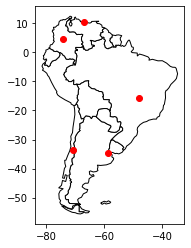

In [58]:
# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()

## Using GeoDataFrame

In [59]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [60]:
countries['pop_est'].mean()

41712369.84180791

In [61]:
asia = countries[countries['continent'] == 'Asia']

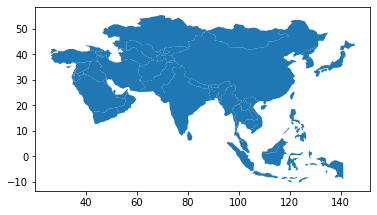

In [62]:
asia.plot()

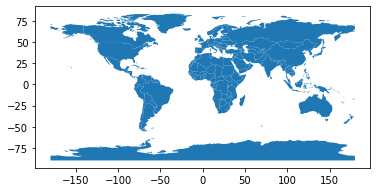

In [63]:
countries.plot()

## Overlaying Multiple Map Layers

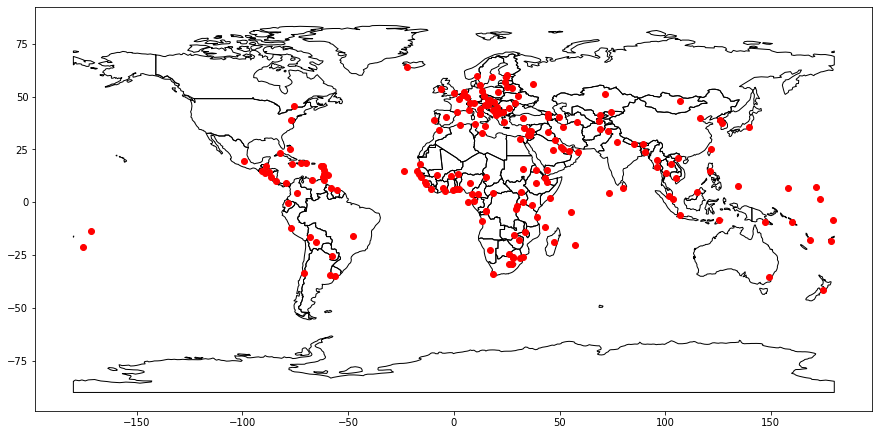

In [64]:
base = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
cities.plot(ax=base, color='red')

## Ex: Overlaying Multiple Map Layerss


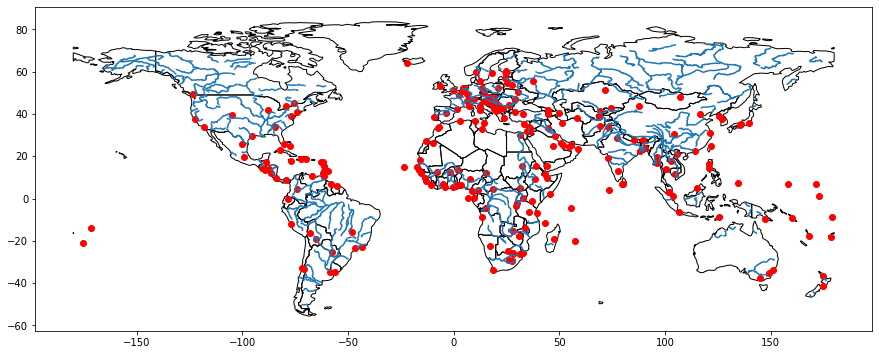

In [79]:
cities = geopandas.read_file("zip://data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("zip://data/ne_50m_rivers_lake_centerlines.zip")

base = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=base)
cities.plot(ax=base, color='red')

## Color Schmes

In [66]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [67]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

In [68]:
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

/Users/anqitu/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


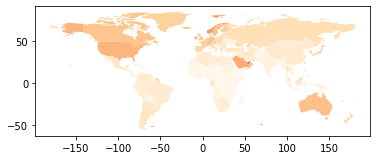

In [69]:
world.plot(column='gdp_per_cap', cmap='OrRd')

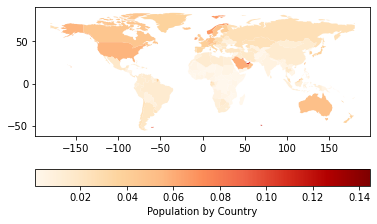

In [70]:
world.plot(column='gdp_per_cap', cmap='OrRd', 
           legend = True, 
           legend_kwds={'label': "Population by Country",
                      'orientation': "horizontal"})

## Coordinate Reference System 

In [71]:
countries = geopandas.read_file("zip://data/ne_110m_admin_0_countries.zip")

In [72]:
countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


In [73]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

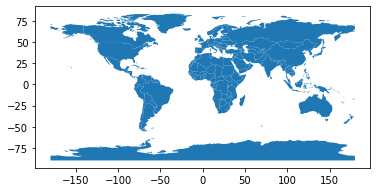

In [74]:
countries.plot()

In [75]:
# remove Antartica, as the Mercator projection cannot deal with the poles
countries = countries[(countries['name'] != "Antarctica")]

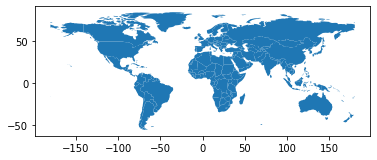

In [76]:
countries.plot()

In [77]:
countries_mercator = countries.to_crs(epsg=3395)  # or .to_crs({'init': 'epsg:3395'})

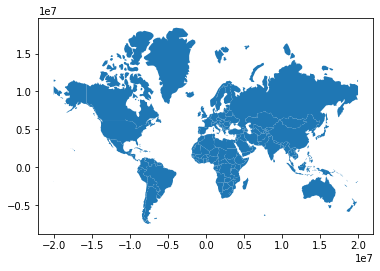

In [78]:
countries_mercator.plot()